# Hierarchical Clustering Implementation

#### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#### Import Dataset

In [2]:
iris = datasets.load_iris()

In [6]:
iris_data = pd.DataFrame(iris.data)

In [8]:
iris_data.columns = iris.feature_names

In [9]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Standardization

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
X_scaled = scaler.fit_transform(iris_data)

In [15]:
X_scaled.shape

(150, 4)

#### PCA (here we are convering 4 dimension to 2 dimenstion)

In [17]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)

In [20]:
pca_scaled = pca.fit_transform(X_scaled)

In [21]:
pca_scaled.shape

(150, 2)

#### Plotting after PCA

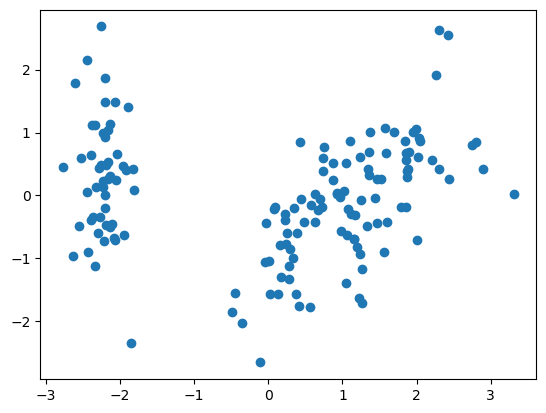

In [22]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

#### Insights
Here we converted 4 dimension to 2 Dimension

## Agglomerative Clustering

#### Dendogram

for dendogram use this same code. there is no change for code for any problem

Text(0, 0.5, 'Euclidean Distance')

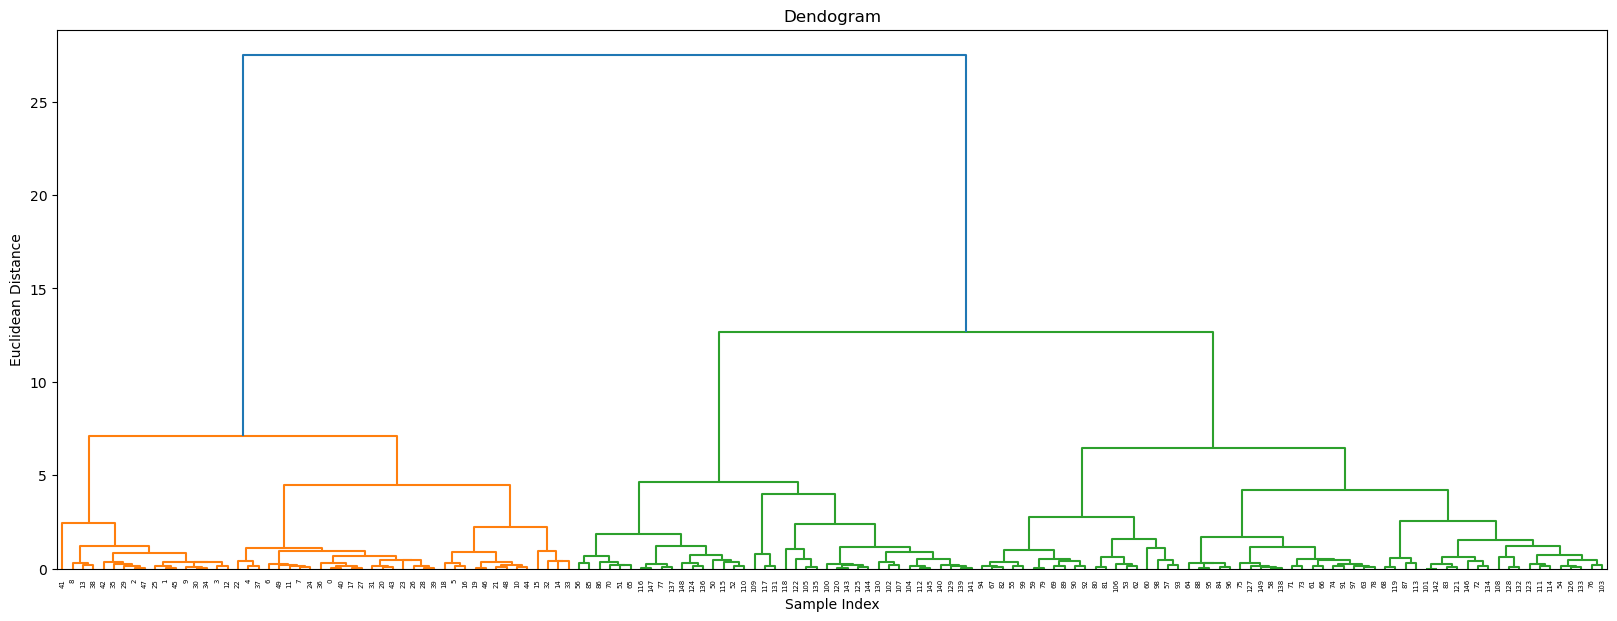

In [24]:
import scipy.cluster.hierarchy as sc
#plot dendogram
plt.figure(figsize=(20,7))
plt.title("Dendogram")

#Create Dendogram
sc.dendrogram(sc.linkage(pca_scaled,method="ward"))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')

#### Insights
from the above plot value of k = 2 (Reason: Refer note)

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [28]:
#clusters (1= cluster1, 0 = cluster2)
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

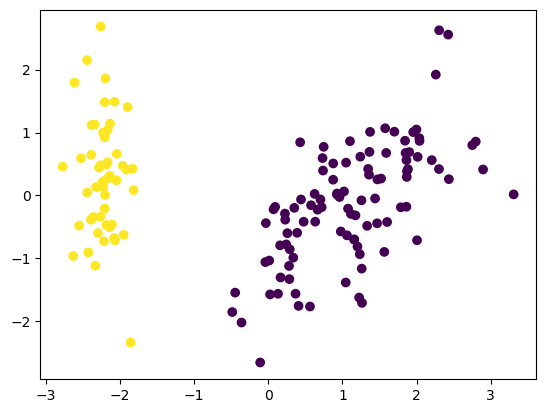

In [29]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

## SILHOUETTE SCORE

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
silhouette_coefficients = []
for k in range(2,11):
    agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(pca_scaled)
    score = silhouette_score(pca_scaled,agglo.labels_)
    silhouette_coefficients.append(score)

In [33]:
silhouette_coefficients

[0.614520203623045,
 0.511059598876619,
 0.4487350420958893,
 0.4041689631006268,
 0.3672112889583074,
 0.3706820678912666,
 0.3930552606912112,
 0.4183694466469873,
 0.4054205628889491]

#### Plotting Silhouette score

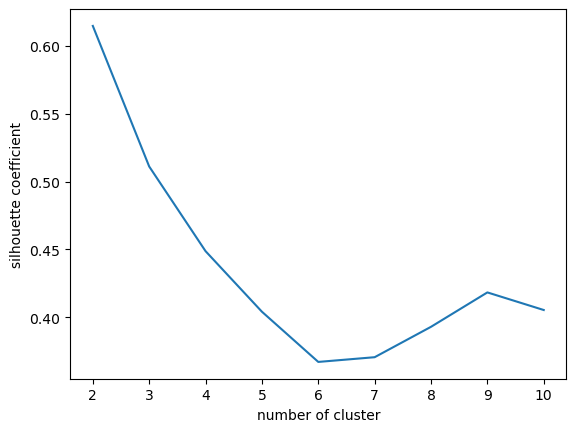

In [34]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('number of cluster')
plt.ylabel('silhouette coefficient')
plt.show()

#### Insights
   for k = 2 we got maximum silhouette score